# **Data Science Projects Roadmap**

### Was ist eine mögliche Vorgehensweise um ein Data Science Projekt zu starten

1. Datenbeschaffung
2. Daten-reinigung & -manipulation
3. Daten Visualisierung
4. Fazit aus den Daten



##### Zuerst einmal importiere ich alle Libraries die ich brauchen werde:

In [1]:
import pandas as pd  # Tabellen aus Daten und etliche Operationen für diese
import numpy as np  # Hauptsächlich Matrixen, aber allgemein einfach für den Umgang mit Zahlen geeignet
import matplotlib.pyplot as plt  # Visualisierung von Daten in Graphen
import seaborn as sns  # Visualisierung von Daten in Graphen
import sklearn as sk  # Regression und Statistische Analysis 
import math
import plotly.express as px
sns.set_style()

In der nächsten Zeile ist mein Web Scraper für Benzinpreise, den ich schon zwei Monate laufen lassen habe. Daraus resultieren unsere Daten in der Datei Benzinrpeise.csv

In [2]:
'''
import requests  # Die notwendigen Libraries werden importiert
from bs4 import BeautifulSoup
import csv
import time
from datetime import datetime
from keep_alive import keep_alive
from hacker_news import hacker_news
from stocks import stocks_and_news

while True:  # Dauerschleife wird erstellt
    hour = int(datetime.now().strftime('%H'))   # Die derzeitige Zeit wird abgerufen und ins richtige Format gebracht
    keep_alive()  # Das ist ein extra File, der ausgeführt wird, um ein kleinen Server zu erstellen, damit ich diesen anpingen kann und das Programm unegranz lang im Internet laufen kann
    url = 'https://www.benzinpreis.de/aktuell/super_e5/deutschland/baden-wuerttemberg/karlsruhe/landkreis_heidelberg/heidelberg'

    response = requests.get(
        url,
        headers={
            "Accept-Language":
            "de-DE,de;q=0.9,en-US;q=0.8,en;q=0.7",
            "User-Agent":
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
            "Accept-Encoding":
            "gzip, deflate",
            "Upgrade-Insecure-Requests":
            "1",
            "Accept":
            "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"
        })
    soup = BeautifulSoup(response.text, "lxml")

    prices_list = soup.find_all('td', 'center')
    prices = [i.text for i in prices_list]  # Die gescrapten Daten werden ins richtige Format gebracht 

    with open('test.csv', 'a') as tempLog:
        csv.writer(tempLog).writerow([
            f"Kategorie (Datum: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}",
            prices[0], prices[1], prices[2]
        ])
        csv.writer(tempLog).writerow(
            ["Günstigster Preis:", prices[3], prices[4], prices[5]])
        csv.writer(tempLog).writerow(
            ["Teuerster Preis:", prices[6], prices[7], prices[8]])
        csv.writer(tempLog).writerow(
            ["Durchschnittspreis:", prices[9], prices[10], prices[11]])
    time.sleep(3600)  
    # Die gescrapten Daten werden in einer csv-Datei festgehalten und es wird eine Stunde gewartet bis das ganze erneut durchgeführt wird
'''
print('')  # Nur für Jupyter Notebook damit kein Output entsteht

##### Zunächst importiere ich meine Daten, die ich gescrapt habe, ansonsten würde man die Daten von Websiten herunterladen, manuell sammeln oder auf sonstigen Weg beschaffen. 

In [56]:
df = pd.read_csv('durchschnitts_preis.csv')  # Die csv-Datei wird eingelesen
df['Datum'] = pd.to_datetime(df['Datum'])  # Das Datum wird in das richtige Format gebracht
#df['column name'] = df['column name'].str.replace('old character','new character')
df['Super'] = df['Super'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df['Super'] = pd.to_numeric(df['Super'])  # Die Preise werden in das richtige Format gebracht
df['E10'] = df['E10'].str.replace(',','.') 
df['E10'] = pd.to_numeric(df['E10']) 
df['Diesel'] = df['Diesel'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df['Diesel'] = pd.to_numeric(df['Diesel'])  # Die Preise werden in das richtige Format gebracht
df

,Datum,Super,E10,Diesel
0,2022-09-09 09:44:16,1.964,1.906,2.208
1,2022-09-09 10:59:47,1.995,1.937,2.250
2,2022-09-09 12:15:06,1.943,1.885,2.210
3,2022-09-09 13:29:05,1.920,1.864,2.213
4,2022-09-09 14:46:09,1.913,1.855,2.198
...,...,...,...,...
1906,2022-12-09 09:57:57,1.833,1.772,1.879
1907,2022-12-09 10:57:45,1.805,1.744,1.867
1908,2022-12-09 11:57:47,1.842,1.781,1.905
1909,2022-12-09 12:57:49,1.782,1.720,1.860


In [30]:
df_teuer = pd.read_csv('teuerster_preis.csv')  # Die csv-Datei wird eingelesen
df_teuer['Datum'] = pd.to_datetime(df_teuer['Datum'])  # Das Datum wird in das richtige Format gebracht
#df_teuer['column name'] = df_teuer['column name'].str.replace('old character','new character')
df_teuer['Super'] = df_teuer['Super'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df_teuer['Super'] = pd.to_numeric(df_teuer['Super'])  # Die Preise werden in das richtige Format gebracht
df_teuer['E10'] = df_teuer['E10'].str.replace(',','.') 
df_teuer['E10'] = pd.to_numeric(df_teuer['E10']) 
df_teuer['Diesel'] = df_teuer['Diesel'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df_teuer['Diesel'] = pd.to_numeric(df_teuer['Diesel'])  # Die Preise werden in das richtige Format gebracht
df_teuer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Datum   1912 non-null   datetime64[ns]
 1   Super   1912 non-null   float64       
 2   E10     1912 non-null   float64       
 3   Diesel  1912 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 59.9 KB


In [29]:
df_guenstig = pd.read_csv('guenstigster_preis.csv')  # Die csv-Datei wird eingelesen
df_guenstig['Datum'] = pd.to_datetime(df_guenstig['Datum'])  # Das Datum wird in das richtige Format gebracht
#df_guenstig['column name'] = df_guenstig['column name'].str.replace('old character','new character')
df_guenstig['Super'] = df_guenstig['Super'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df_guenstig['Super'] = pd.to_numeric(df_guenstig['Super'])  # Die Preise werden in das richtige Format gebracht
df_guenstig['E10'] = df_guenstig['E10'].str.replace(',','.') 
df_guenstig['E10'] = pd.to_numeric(df_guenstig['E10']) 
df_guenstig['Diesel'] = df_guenstig['Diesel'].str.replace(',','.') # Kommas werden durch Punkte ersetzt
df_guenstig['Diesel'] = pd.to_numeric(df_guenstig['Diesel'])  # Die Preise werden in das richtige Format gebracht
df_guenstig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Datum   1912 non-null   datetime64[ns]
 1   Super   1912 non-null   float64       
 2   E10     1912 non-null   float64       
 3   Diesel  1912 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 59.9 KB


Jetzt sind alle Daten gereinigt und im richtigen Format, jetzt kann ich anfangen, damit zu arbeiten und Visualisierungen zu erstellen

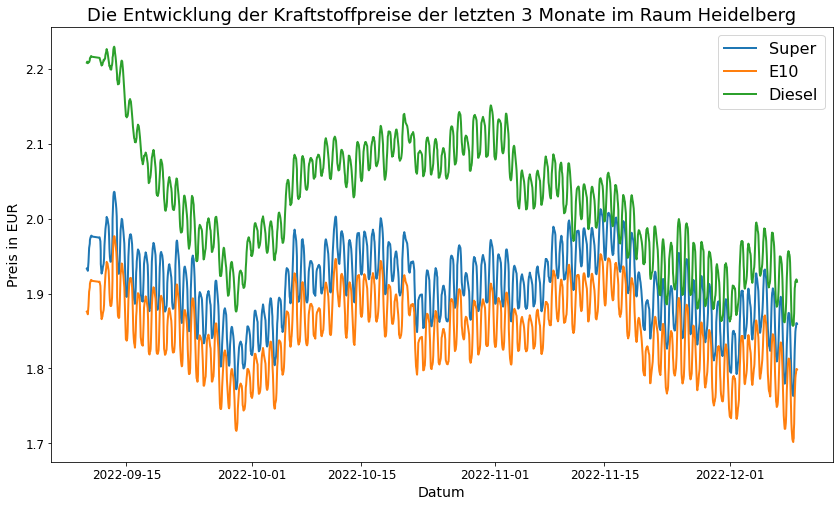

In [24]:

plt.figure(figsize=(14, 8))
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Preis in EUR', fontsize=14)
plt.title('Die Entwicklung der Kraftstoffpreise der letzten 3 Monate im Raum Heidelberg', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for column in df.columns:
    if column == 'Datum':
        pass
    else:
        plt.plot(df['Datum'], df[column].rolling(window=12).mean(), linewidth=2, label=df[column].name)
plt.legend(fontsize=16)       

/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_46513/2551353220.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Datum'], dtype='object')
  df_roll_guenstig = df_guenstig.rolling(window=12).mean()
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_46513/2551353220.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Datum'], dtype='object')
  df_roll_teuerster = df_teuer.rolling(window=12).mean()
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_46513/2551353220.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before c

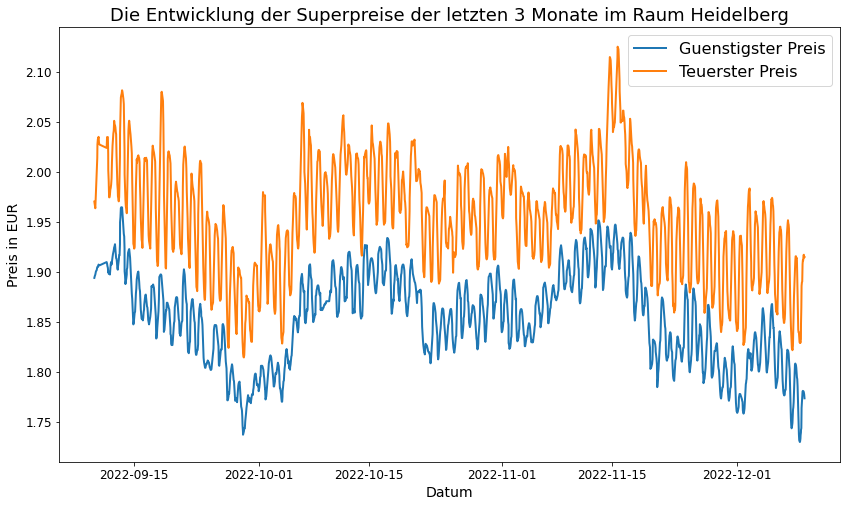

In [41]:
df_roll_guenstig = df_guenstig.rolling(window=12).mean()
df_roll_teuerster = df_teuer.rolling(window=12).mean()
df_roll_durchschnitt = df.rolling(window=12).mean()

plt.figure(figsize=(14, 8))
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Preis in EUR', fontsize=14)
plt.title('Die Entwicklung der Superpreise der letzten 3 Monate im Raum Heidelberg', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.plot(df_guenstig['Datum'], df_roll_guenstig['Super'], linewidth=2, label='Guenstigster Preis')
plt.plot(df_teuer['Datum'], df_roll_teuerster['Super'], linewidth=2, label='Teuerster Preis')
#plt.plot(df['Datum'], df_roll_durchschnitt['Super'], linewidth=2, label='Durchschnittspreis')
plt.legend(fontsize=16)          

Man kann klar erkennen, dass alle Tankstellen an einem Strang ziehen, dass Sie mit paar Cent Unterschied denselben Preis haben, dass kann daran liegen, das manche Tankstellen eher abseits liegen und dadurch um Kunden anzulocken einen günstigeren Preis anbieten. Umgekehrt auch zentrale Tankstellen die eine sehr hohe Nachfrage nachweisen, könnten ein höheren Preis verlangen.

Im nächaten Schritt werde ich nur mit den Durchschnittspreisen arbeiten und werde untersuchen, ob sich eine bestimmte Uhrzeit oder ein Tag besonders anbietet

In [42]:
df.dtypes

Datum     datetime64[ns]
Super            float64
E10              float64
Diesel           float64
dtype: object

In [43]:
df_durchschnitt_zeit = df.copy()
def hr_func(ts):
    return ts.hour
df_durchschnitt_zeit['Stunde'] = df_durchschnitt_zeit['Datum'].apply(hr_func)
df_durchschnitt_zeit

,Datum,Super,E10,Diesel,Stunde
0,2022-09-09 09:44:16,1.922,1.862,2.184,9
1,2022-09-09 10:59:47,1.922,1.862,2.154,10
2,2022-09-09 12:15:06,1.902,1.842,2.154,12
3,2022-09-09 13:29:05,1.882,1.832,2.154,13
4,2022-09-09 14:46:09,1.882,1.832,2.154,14
...,...,...,...,...,...
1907,2022-12-09 10:57:45,1.764,1.700,1.838,10
1908,2022-12-09 11:57:47,1.764,1.700,1.827,11
1909,2022-12-09 12:57:49,1.753,1.690,1.817,12
1910,2022-12-09 13:57:51,1.743,1.679,1.817,13


In [44]:
df_hour_1 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 1]
df_hour_1.head()

,Datum,Super,E10,Diesel,Stunde
13,2022-09-10 01:46:57,1.942,1.882,2.214,1
33,2022-09-12 01:01:21,1.942,1.882,2.214,1
53,2022-09-13 01:34:51,1.957,1.896,2.221,1
174,2022-09-19 01:09:11,1.898,1.838,2.018,1
195,2022-09-20 01:42:51,1.893,1.834,2.013,1


In [45]:
df_hour_1_mean = df_hour_1['Super'].mean
df_hour_1_median = df_hour_1['Super'].median
df_hour_1_mean()

1.8755657894736846

In [46]:
#Ich setze den Absatz jeweils immer in Vs Code ein und mache Find & Replace und ersetze z.B. die '1' mit der '2' und so weiter um mir Zeit zu sparen

#Nach wenigen Minuten Überlegung habe ich folgenden Code angewandt
#string = 
'''
df_hour_7 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 7]
df_hour_7_meanmedian7 = df_hour_7['Super'].mean
df_hour_7_median = df_hour_7['Super'].median
'''
#for i in range(0, 24):
    #print(string.replace('7', str(i)))
    
#Nach nochmal paar Minuten Überlegung ist mir eine noch bessere Idee gekommen und ich habe das hier nicht mehr gebraucht, aber
#zur Visualisierung, dass es immer mehrere Wege gibt, lasse ich es drin
    
    
df_hour_1 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 1]       
df_hour_1_mean = df_hour_1['Super'].mean
df_hour_1_median = df_hour_1['Super'].median


df_hour_2 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 2]       
df_hour_2_mean = df_hour_2['Super'].mean
df_hour_2_median = df_hour_2['Super'].median


df_hour_3 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 3]       
df_hour_3_mean = df_hour_3['Super'].mean
df_hour_3_median = df_hour_3['Super'].median


df_hour_4 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 4]       
df_hour_4_mean = df_hour_4['Super'].mean
df_hour_4_median = df_hour_4['Super'].median


df_hour_5 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 5]       
df_hour_5_mean = df_hour_5['Super'].mean
df_hour_5_median = df_hour_5['Super'].median


df_hour_6 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 6]       
df_hour_6_mean = df_hour_6['Super'].mean
df_hour_6_median = df_hour_6['Super'].median


df_hour_7 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 7]       
df_hour_7_mean = df_hour_7['Super'].mean
df_hour_7_median = df_hour_7['Super'].median


df_hour_8 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 8]       
df_hour_8_mean = df_hour_8['Super'].mean
df_hour_8_median = df_hour_8['Super'].median


df_hour_9 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 9]       
df_hour_9_mean = df_hour_9['Super'].mean
df_hour_9_median = df_hour_9['Super'].median


df_hour_10 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 10]     
df_hour_10_mean = df_hour_10['Super'].mean
df_hour_10_median = df_hour_10['Super'].median


df_hour_11 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 11]     
df_hour_11_mean = df_hour_11['Super'].mean
df_hour_11_median = df_hour_11['Super'].median


df_hour_12 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 12]     
df_hour_12_mean = df_hour_12['Super'].mean
df_hour_12_median = df_hour_12['Super'].median


df_hour_13 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 13]     
df_hour_13_mean = df_hour_13['Super'].mean
df_hour_13_median = df_hour_13['Super'].median


df_hour_14 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 14]     
df_hour_14_mean = df_hour_14['Super'].mean
df_hour_14_median = df_hour_14['Super'].median


df_hour_15 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 15]     
df_hour_15_mean = df_hour_15['Super'].mean
df_hour_15_median = df_hour_15['Super'].median


df_hour_16 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 16]     
df_hour_16_mean = df_hour_16['Super'].mean
df_hour_16_median = df_hour_16['Super'].median


df_hour_17 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 17]     
df_hour_17_mean = df_hour_17['Super'].mean
df_hour_17_median = df_hour_17['Super'].median


df_hour_18 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 18]     
df_hour_18_mean = df_hour_18['Super'].mean
df_hour_18_median = df_hour_18['Super'].median


df_hour_19 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 19]     
df_hour_19_mean = df_hour_19['Super'].mean
df_hour_19_median = df_hour_19['Super'].median


df_hour_20 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 20]     
df_hour_20_mean = df_hour_20['Super'].mean
df_hour_20_median = df_hour_20['Super'].median


df_hour_21 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 21]     
df_hour_21_mean = df_hour_21['Super'].mean
df_hour_21_median = df_hour_21['Super'].median


df_hour_22 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 22]     
df_hour_22_mean = df_hour_22['Super'].mean
df_hour_22_median = df_hour_22['Super'].median


df_hour_23 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 23]     
df_hour_23_mean = df_hour_23['Super'].mean
df_hour_23_median = df_hour_23['Super'].median


df_hour_24 = df_durchschnitt_zeit[df_durchschnitt_zeit['Stunde'] == 0]     
df_hour_24_mean = df_hour_24['Super'].mean
df_hour_24_median = df_hour_24['Super'].median

In [47]:
#for i in range(0, 24):
    #print(f'{i}:df_hour_{i}_mean(),', end='')
#for i in range(0, 24):
    #print(f'{i}:df_hour_{i}_median(),', end='')    
    
dict_hour_median = {1:df_hour_1_median(),2:df_hour_2_median(),3:df_hour_3_median(),
                    4:df_hour_4_median(),5:df_hour_5_median(),6:df_hour_6_median(),
                    7:df_hour_7_median(),8:df_hour_8_median(),9:df_hour_9_median(),
                    10:df_hour_10_median(),11:df_hour_11_median(),12:df_hour_12_median(),
                    13:df_hour_13_median(),14:df_hour_14_median(),15:df_hour_15_median(),
                    16:df_hour_16_median(),17:df_hour_17_median(),18:df_hour_18_median(),
                    19:df_hour_19_median(),20:df_hour_20_median(),21:df_hour_21_median(),
                    22:df_hour_22_median(),23:df_hour_23_median(),0:df_hour_24_median()}    
    
dict_hour_mean = {1:df_hour_1_mean(),2:df_hour_2_mean(),3:df_hour_3_mean(),
             4:df_hour_4_mean(),5:df_hour_5_mean(),6:df_hour_6_mean(),
             7:df_hour_7_mean(),8:df_hour_8_mean(),9:df_hour_9_mean(),
             10:df_hour_10_mean(),11:df_hour_11_mean(),12:df_hour_12_mean(),
             13:df_hour_13_mean(),14:df_hour_14_mean(),15:df_hour_15_mean(),
             16:df_hour_16_mean(),17:df_hour_17_mean(),18:df_hour_18_mean(),19:df_hour_19_mean(),
             20:df_hour_20_mean(),21:df_hour_21_mean(),22:df_hour_22_mean(),23:df_hour_23_mean(),0:df_hour_24_mean()}

hours_mean = list(dict_hour_mean.keys())
mean_price = list(dict_hour_mean.values())

hours_median = list(dict_hour_median.keys())
median_price = list(dict_hour_median.values())
print(mean_price)

[1.8755657894736846, 1.8757160493827163, 1.8578131868131873, 1.8602535211267606, 1.919012987012987, 1.920938271604938, 1.8825421686746986, 1.879857142857143, 1.8594444444444445, 1.8438552631578948, 1.8349220779220778, 1.8281927710843369, 1.8288205128205128, 1.822392857142857, 1.8207948717948716, 1.818432098765432, 1.8226941176470592, 1.8216753246753243, 1.8163975903614453, 1.8273506493506488, 1.8352891566265062, 1.841229885057471, 1.8641408450704227, 1.875843373493976]


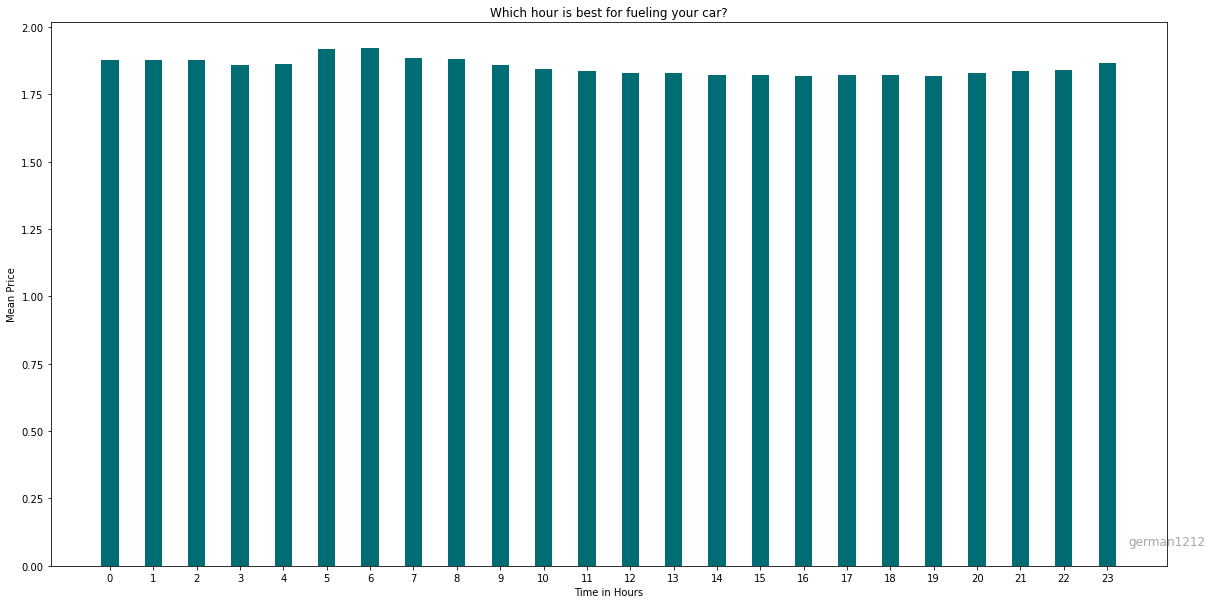

In [48]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(hours_mean, mean_price, color ='#006D75',
        width = 0.4)
 
plt.xlabel("Time in Hours")
plt.ylabel("Mean Price")
plt.title("Which hour is best for fueling your car?")
fig.text(0.9, 0.15, 'german1212', fontsize = 12,
         color ='grey', ha ='center', va ='bottom',
         alpha = 0.7)
plt.xticks(np.arange(0, 24, 1))

plt.show()

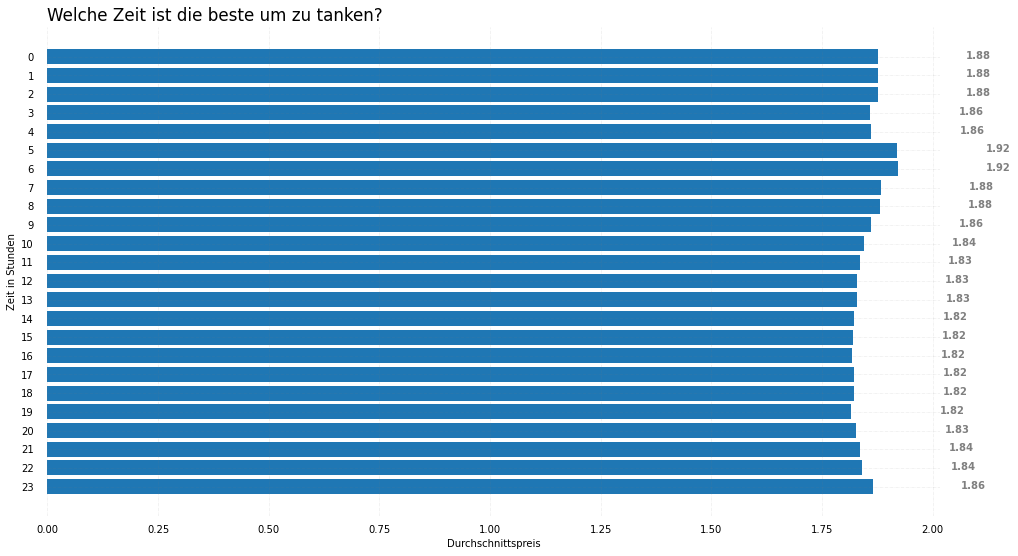

In [49]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
plt.rcParams.update({'font.size': 14}) 
# Horizontal Bar Plot
ax.barh(hours_mean, mean_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Welche Zeit ist die beste um zu tanken?',
             loc ='left', )
 
# Add Text watermark
'''
fig.text(0.9, 0.15, 'german1212', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
''' 
plt.xlabel("Durchschnittspreis")
plt.ylabel("Zeit in Stunden")
plt.yticks(np.arange(0,24))
# Show Plot
plt.show()

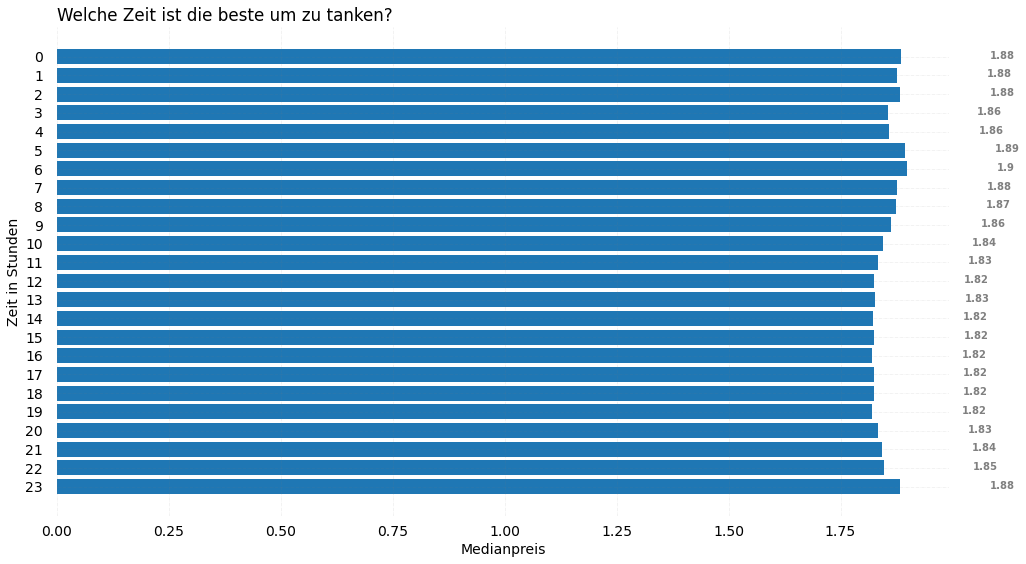

In [50]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
plt.rcParams.update({'font.size': 14}) 
# Horizontal Bar Plot
ax.barh(hours_mean, median_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Welche Zeit ist die beste um zu tanken?',
             loc ='left', )
 
# Add Text watermark
'''
fig.text(0.9, 0.15, 'german1212', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
''' 
plt.xlabel("Medianpreis")
plt.ylabel("Zeit in Stunden")
plt.yticks(np.arange(0,24))
# Show Plot
plt.show()

In [51]:
df_durchschnitt_tag = df.copy()
def day_func(ts):
    return ts.dayofweek
df_durchschnitt_tag['Tag'] = pd.to_datetime(df_durchschnitt_tag['Datum'].dt.strftime('%m/%d/%Y'))
df_durchschnitt_tag['Tag'] = pd.to_datetime(df_durchschnitt_tag['Tag'], format='%Y%m%d').apply(day_func)
df_durchschnitt_tag
#Tag 0 = Monday and Sunday = 6

,Datum,Super,E10,Diesel,Tag
0,2022-09-09 09:44:16,1.922,1.862,2.184,4
1,2022-09-09 10:59:47,1.922,1.862,2.154,4
2,2022-09-09 12:15:06,1.902,1.842,2.154,4
3,2022-09-09 13:29:05,1.882,1.832,2.154,4
4,2022-09-09 14:46:09,1.882,1.832,2.154,4
...,...,...,...,...,...
1907,2022-12-09 10:57:45,1.764,1.700,1.838,4
1908,2022-12-09 11:57:47,1.764,1.700,1.827,4
1909,2022-12-09 12:57:49,1.753,1.690,1.817,4
1910,2022-12-09 13:57:51,1.743,1.679,1.817,4


In [52]:
#days = ['dienstag', 'mittwoch', 'donnnerstag', 'freitag', 'samstag', 'sonntag']
#for i in days:
    #print(f'{string.replace("montag", i)}', end='')

df_durchschnitt_montag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 0]
df_montag_mean = df_durchschnitt_montag['Super'].mean
df_montag_median = df_durchschnitt_montag['Super'].median

df_durchschnitt_dienstag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 1]
df_dienstag_mean = df_durchschnitt_dienstag['Super'].mean
df_dienstag_median = df_durchschnitt_dienstag['Super'].median

df_durchschnitt_mittwoch = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 2]
df_mittwoch_mean = df_durchschnitt_mittwoch['Super'].mean
df_mittwoch_median = df_durchschnitt_mittwoch['Super'].median

df_durchschnitt_donnerstag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 3]
df_donnnerstag_mean = df_durchschnitt_donnerstag['Super'].mean
df_donnnerstag_median = df_durchschnitt_donnerstag['Super'].median

df_durchschnitt_freitag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 4]
df_freitag_mean = df_durchschnitt_freitag['Super'].mean
df_freitag_median = df_durchschnitt_freitag['Super'].median

df_durchschnitt_samstag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 5]
df_samstag_mean = df_durchschnitt_samstag['Super'].mean
df_samstag_median = df_durchschnitt_samstag['Super'].median

df_durchschnitt_sonntag = df_durchschnitt_tag[df_durchschnitt_tag['Tag'] == 6]
df_sonntag_mean = df_durchschnitt_sonntag['Super'].mean
df_sonntag_median = df_durchschnitt_sonntag['Super'].median

In [53]:
#days = ['montag', 'dienstag', 'mittwoch', 'donnnerstag', 'freitag', 'samstag', 'sonntag']
#for i in days:
    #print(f'"{i}":df_{i}_mean,', end='')

dict_tag_mean = {"montag":round(df_montag_mean(), 2),"dienstag":round(df_dienstag_mean(), 2),
                 "mittwoch":round(df_mittwoch_mean(), 2),"donnnerstag":round(df_donnnerstag_mean(), 2),
                 "freitag":round(df_freitag_mean(), 2),"samstag":round(df_samstag_mean(), 2),
                 "sonntag":round(df_sonntag_mean(), 2)}

#days = ['montag', 'dienstag', 'mittwoch', 'donnnerstag', 'freitag', 'samstag', 'sonntag']
#for i in days:
    #print(f'"{i}":df_{i}_median,', end='')

dict_tag_median = {"montag":round(df_montag_median(), 2),"dienstag":round(df_dienstag_median(), 2),
                   "mittwoch":round(df_mittwoch_median(), 2),"donnnerstag":round(df_donnnerstag_median(), 2),
                   "freitag":round(df_freitag_median(), 2),"samstag":round(df_samstag_median(), 2),
                   "sonntag":round(df_sonntag_median(), 2)}

tag_mean = list(dict_tag_mean.keys())
mean_price = list(dict_tag_mean.values())

tag_median = list(dict_tag_median.keys())
median_price = list(dict_tag_median.values())

print(mean_price)
print(median_price)

[1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.86]
[1.85, 1.85, 1.85, 1.85, 1.84, 1.84, 1.85]


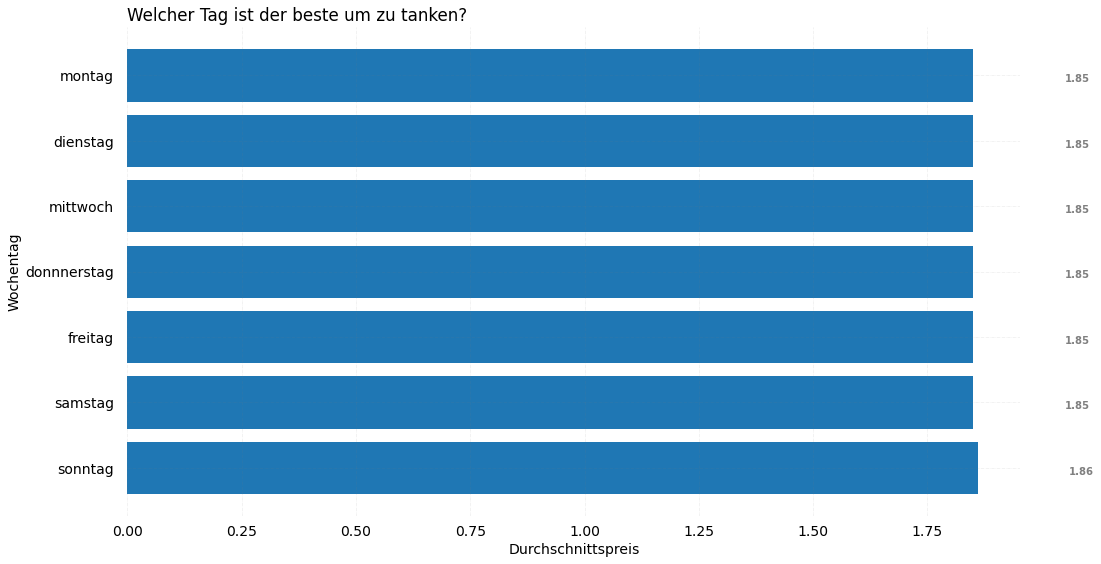

In [54]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
plt.rcParams.update({'font.size': 14}) 
# Horizontal Bar Plot
ax.barh(tag_mean, mean_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Welcher Tag ist der beste um zu tanken?',
             loc ='left', )
 
# Add Text watermark
'''
fig.text(0.9, 0.15, 'german1212', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
''' 
plt.xlabel("Durchschnittspreis")
plt.ylabel("Wochentag")
plt.yticks(np.arange(0,7))
# Show Plot
plt.show()

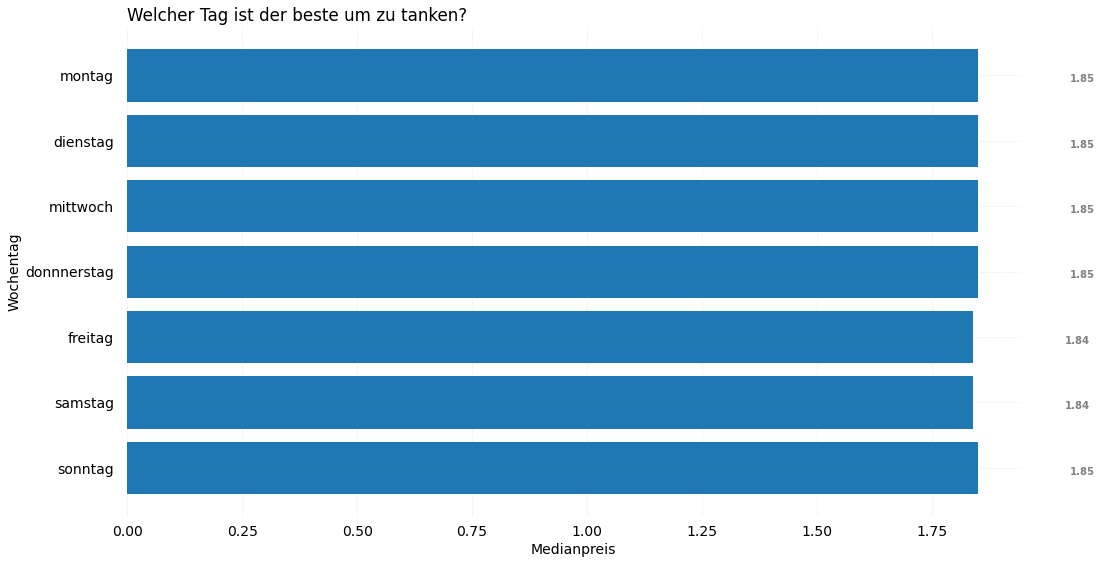

In [57]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
plt.rcParams.update({'font.size': 14}) 
# Horizontal Bar Plot
ax.barh(tag_median, median_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Welcher Tag ist der beste um zu tanken?',
             loc ='left', )
 
# Add Text watermark
'''
fig.text(0.9, 0.15, 'german1212', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
''' 
plt.xlabel("Medianpreis")
plt.ylabel("Wochentag")
plt.yticks(np.arange(0,7))
# Show Plot
plt.show()

# **Fazit**

### Kraftstoff

Es gibt klare Unterschiede, beim Preis von verschiedenen Kraftstoffen 

### Tankstellen 

Auch bei den Tankstellen, kann es unter Umständen bis zu 20ct. Unterschied geben. Es kann sich daher manchmal lohnen zu einer betimmten Tankstelle zu fahren 

### Uhrzeit

Die Uhrzeit ist teilweise signifikant teilweise nicht. Es gibt keine klare Tendenz, wann der Preis am günstigsten ist. Eine subjkektive Vermutung  ist, dass der Preis um 18-19 Uhr günstiger ist, weil es in der Vergangenheit so war. 

### Tag

Ebenso der Tag ist nicht signifikant. Der Dienstag hat sich jedoch in der Vergangenheit als einer der besten Tage zum tanken herausgestellt. Siehe mein Github Repository **Benzinpreise-Analysis-Heidelberg** für mehr Informationen